### In this assignment students have to compress racoon grey scale image into 5 clusters. In the end, visualize both raw and compressed image and look for quality difference. The raw image is available in scipy.misc package with the name face.

Hint:

In [25]:
import numpy as np
from sklearn import cluster, datasets
from scipy import misc
import matplotlib.pyplot as plt

In [26]:
face = misc.face(gray=True)

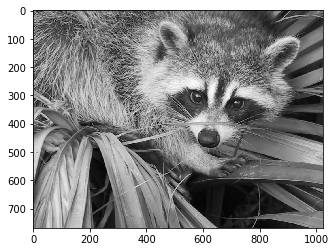

In [37]:
#checking image
plt.imshow(face)

<Figure size 432x288 with 0 Axes>

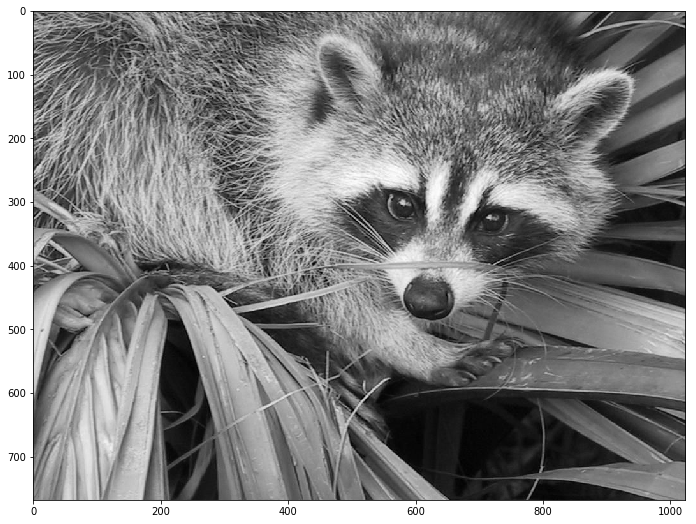

In [38]:
#show gray scale racoon image 

plt.gray()
plt.figure(figsize=(16,9))
plt.imshow(face)
plt.show()

In [29]:
#Prints the shape of the face
print(face.shape)

(768, 1024)


In [30]:
#Prints data type of face
print(face.dtype)

uint8


In [31]:
#Given, number of clusters = 5
clusters = 5

#Reshaping the image
image = face.reshape(face.shape[0]*face.shape[1],1)

In [32]:
#Initializing KMeans
kmeans= cluster.KMeans(n_clusters=clusters,n_init=10,max_iter=200, random_state=0)

#Fitting with input
kmeans.fit(image)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=200,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [33]:
#Rows and Columns size of the face image
rows = face.shape[0]
cols = face.shape[1]

#KMeans labels as array
labels = np.asarray(kmeans.labels_,dtype=np.uint8 ) 

#Reshaping the labels with shape of face image
face_compressed = labels.reshape(rows,cols)

<Figure size 432x288 with 0 Axes>

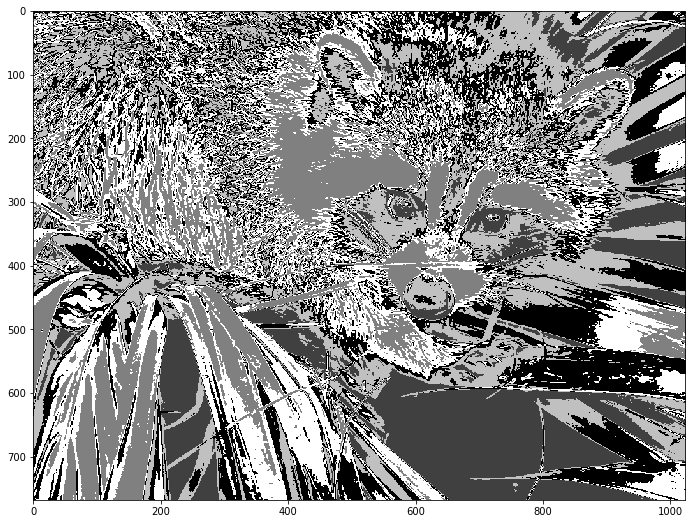

In [34]:
#Show gray image of compressed raccoon face image.
plt.gray()
plt.figure(figsize=(16,9))
plt.imshow(face_compressed)

## Comparing two images

In [35]:
#The 'Mean Squared Error' between the two images is the sum of the squared difference between the two images;
def mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
#Returns the MSE (The lower the error, the more "similar" the two images are)
    return err
 
def compare_images(imageA, imageB, title):
#Computes the mean squared error and structural similarity index for the images
    m = mse(imageA, imageB)
 
    #Setup the figure
    fig = plt.figure(figsize=(16,9))
    plt.title(title)
    plt.suptitle("MSE: %.2f " % (m))    
 
    #Shows first image
    ax = fig.add_subplot(1, 2, 1)    
    plt.imshow(imageA, cmap = plt.cm.gray)
    plt.axis("off")
 
    #Shows the second image
    ax = fig.add_subplot(1, 2, 2)    
    plt.imshow(imageB, cmap = plt.cm.gray)
    plt.axis("off")
 
    #Shows the images   
    plt.show()

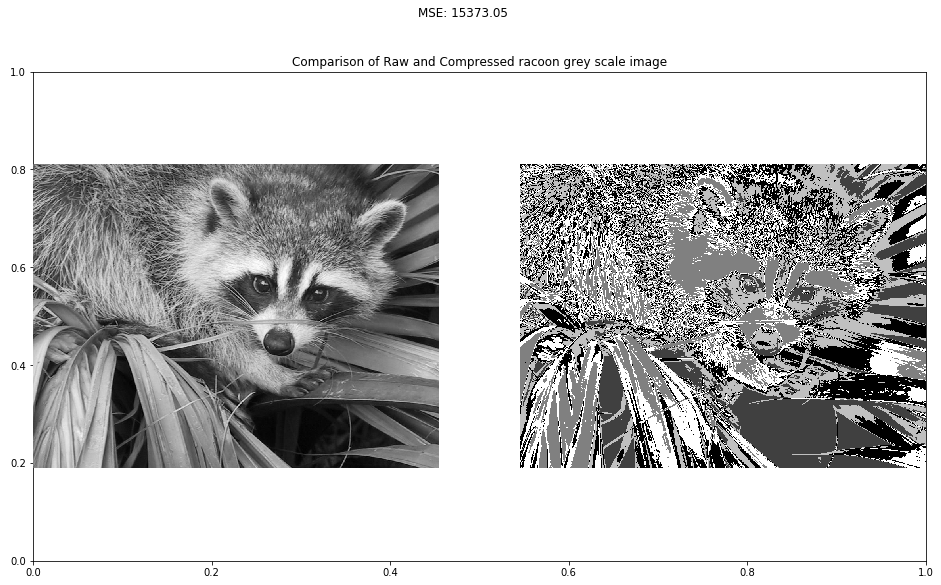

In [36]:
compare_images(face, face_compressed, "Comparison of Raw and Compressed racoon grey scale image")

In [39]:
print("Mean Squared Error:", mse(face, face_compressed))

Mean Squared Error: 15373.047201792398
